In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')

In [3]:
null_counts = df.isnull().sum()

In [4]:
columns_with_nulls = null_counts[null_counts >= 1]
columns_with_nulls

Series([], dtype: int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
X = df.iloc[:,1:3001]
X.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2 ,random_state = 42)

In [9]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# Initialize and train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Make predictions with KNN
y_pred_knn = knn_classifier.predict(X_test)

In [12]:
# Evaluate KNN performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_confmatrix = confusion_matrix(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

In [13]:
print("KNN Accuracy: ", knn_accuracy)
print("KNN Classification report: ", knn_report)


KNN Accuracy:  0.8502415458937198
KNN Classification report:                precision    recall  f1-score   support

           0       0.97      0.81      0.89       739
           1       0.67      0.94      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.86      1035



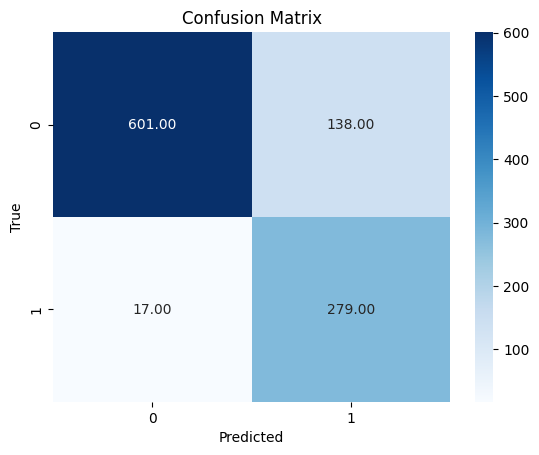

In [14]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(knn_confmatrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Initialize and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)


SVC()

In [16]:
# Make predictions with SVM
y_pred_svm = svm_classifier.predict(X_test)


In [17]:
# Evaluate SVM performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_confmatrix = confusion_matrix(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)


In [18]:
print("SVM Accuracy: ", svm_accuracy)
print("SVM Classification report: ",svm_report)

SVM Accuracy:  0.9439613526570049
SVM Classification report:                precision    recall  f1-score   support

           0       0.93      1.00      0.96       739
           1       0.99      0.81      0.89       296

    accuracy                           0.94      1035
   macro avg       0.96      0.90      0.93      1035
weighted avg       0.95      0.94      0.94      1035



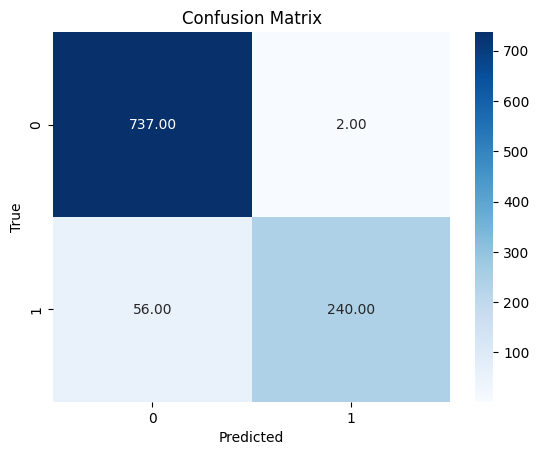

In [19]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(svm_confmatrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()